# Manual hyperparamerters tunning for prediction of crypto currency close price

<p> x_step=6 </p>
<p> without scaling </p>
<p> optimizer='rmsprop' </p>

In [1]:
import numpy as np
import pandas as pd

In [2]:
def convert_data(data, x_step):
  x_data = []
  y_data = []
  for i in range(len(data) - x_step):
    x_data.append(data[i:i+x_step])
    y_data.append(data[i+x_step])
  return np.array(x_data), np.array(y_data)

In [3]:
!wget http://graphemy.ir/datasets/crypto_data.zip

--2025-08-23 10:01:58--  http://graphemy.ir/datasets/crypto_data.zip
Resolving graphemy.ir (graphemy.ir)... 5.9.122.2
Connecting to graphemy.ir (graphemy.ir)|5.9.122.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5998694 (5.7M) [application/zip]
Saving to: ‘crypto_data.zip’

crypto_data.zip     100%[===================>]   5.72M  4.22MB/s    in 1.4s    

2025-08-23 10:02:01 (4.22 MB/s) - ‘crypto_data.zip’ saved [5998694/5998694]



In [4]:
!unzip crypto_data.zip

Archive:  crypto_data.zip
  inflating: crypto_data/BCH-USD.csv  
  inflating: crypto_data/BTC-USD.csv  
  inflating: crypto_data/ETH-USD.csv  
  inflating: crypto_data/LTC-USD.csv  


In [45]:
df=pd.read_csv('crypto_data/LTC-USD.csv', names=['time', 'low', 'high', 'open', 'close', 'volume'])

In [46]:
df.head()

,time,low,high,open,close,volume
0,1528968660,96.580002,96.589996,96.589996,96.580002,9.647200
1,1528968720,96.449997,96.669998,96.589996,96.660004,314.387024
2,1528968780,96.470001,96.570000,96.570000,96.570000,77.129799
3,1528968840,96.449997,96.570000,96.570000,96.500000,7.216067
4,1528968900,96.279999,96.540001,96.500000,96.389999,524.539978


In [32]:
df.close.values.shape

(101883,)

In [8]:
dataset=df.close.values.reshape(-1,1)
dataset.shape

(101883, 1)

In [9]:
x_step=6
X_train, y_train=convert_data(data=dataset[:80000], x_step=x_step)
X_test, y_test=convert_data(data=dataset[80000:], x_step=x_step)

In [10]:
X_train.shape, y_train.shape

((79994, 6, 1), (79994, 1))

In [11]:
X_test.shape, y_test.shape

((21877, 6, 1), (21877, 1))

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,SimpleRNN

In [13]:
model=Sequential()
model.add(Input(shape=(x_step,1)))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64))
model.add(Dense(1))

In [14]:
model.compile(optimizer='rmsprop', loss='mean_squared_error')

In [15]:
history=model.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - loss: 1429.9343
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - loss: 19.6963
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 1.4936
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 0.8881
Epoch 5/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 0.6296
Epoch 6/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - loss: 0.4837
Epoch 7/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 0.4063
Epoch 8/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 0.3459
Epoch 9/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 0.3064
Epoch 10/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 0.2754


<Axes: >

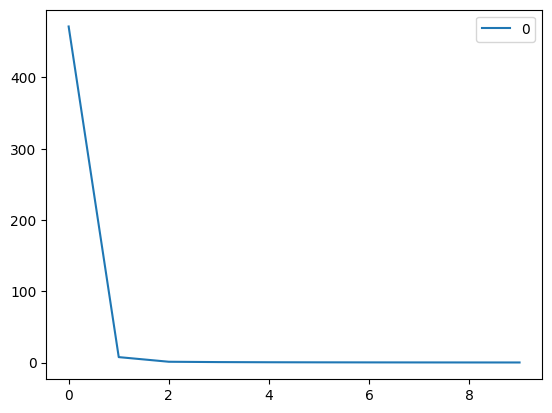

In [16]:
df=pd.DataFrame(history.history['loss'])
df.plot()

In [17]:
test_predicted=model.predict(X_test)

684/684 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [18]:
train_predicted=model.predict(X_train)

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step


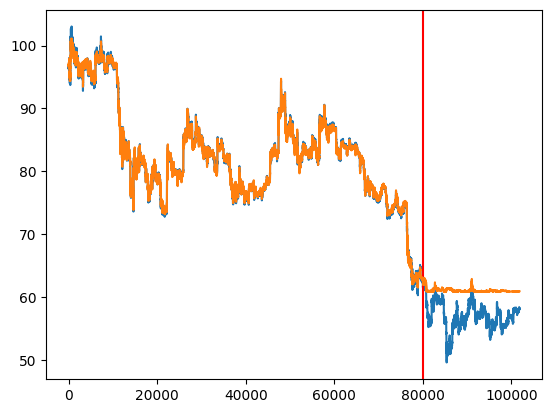

In [21]:
import matplotlib.pyplot as plt
real=np.concatenate((y_train,y_test))
predicted=np.concatenate((train_predicted,test_predicted))

plt.plot(real)
plt.axvline(len(y_train), color="r")
plt.plot(predicted)

x_step=6

with minmax scaling

optimizer='rmsprop'

In [33]:
df.close.values.shape

(101883,)

In [35]:
#dataset=df.close.values.reshape(-1,1)
dataset=df.close.values

x_step=6
X_train, y_train=convert_data(data=dataset[:80000], x_step=x_step)
X_test, y_test=convert_data(data=dataset[80000:], x_step=x_step)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0, 1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

model=Sequential()
model.add(Input(shape=(x_step,1)))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mean_squared_error')

history=model.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - loss: 1344.4034
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - loss: 0.5250
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - loss: 0.2923
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - loss: 0.2263
Epoch 5/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 0.1936
Epoch 6/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 0.1755
Epoch 7/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 0.1624
Epoch 8/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 0.1528
Epoch 9/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - loss: 0.1431
Epoch 10/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 0.1406


<Axes: >

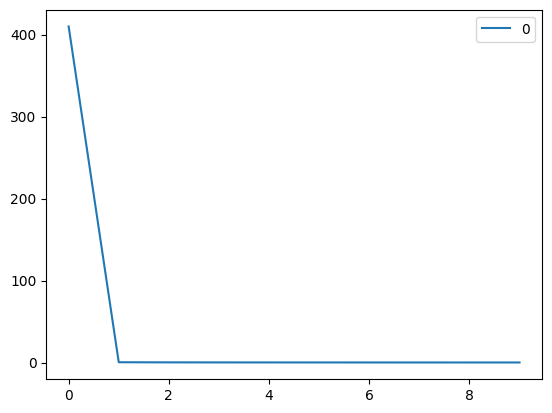

In [36]:
df=pd.DataFrame(history.history['loss'])
df.plot()

684/684 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


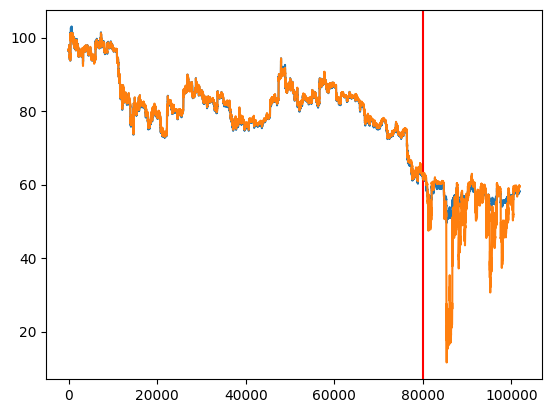

In [37]:
test_predicted=model.predict(X_test)
train_predicted=model.predict(X_train)

real=np.concatenate((y_train,y_test))
predicted=np.concatenate((train_predicted,test_predicted))

plt.plot(real)
plt.axvline(len(y_train), color="r")
plt.plot(predicted)

x_step=4

with minmax scaling

optimizer='rmsprop'

Epoch 1/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 1367.8885
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 0.3086
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 0.1875
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 0.1412
Epoch 5/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 0.1243
Epoch 6/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 0.1136
Epoch 7/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 0.1088
Epoch 8/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 0.1003
Epoch 9/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 0.0986
Epoch 10/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 0.0949


<Axes: >

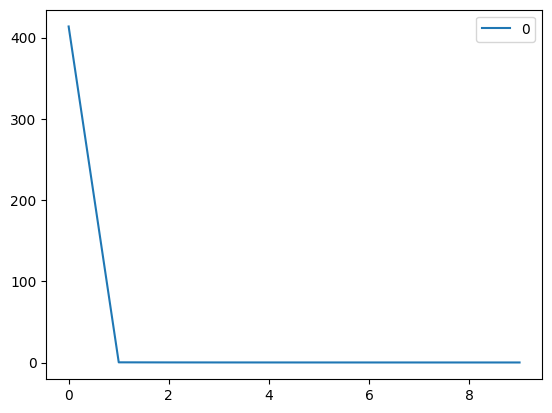

In [48]:
dataset=df.close.values

x_step=4
X_train, y_train=convert_data(data=dataset[:80000], x_step=x_step)
X_test, y_test=convert_data(data=dataset[80000:], x_step=x_step)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0, 1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

model=Sequential()
model.add(Input(shape=(x_step,1)))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mean_squared_error')

history=model.fit(X_train, y_train, epochs=10, batch_size=16)

df1=pd.DataFrame(history.history['loss'])
df1.plot()

684/684 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


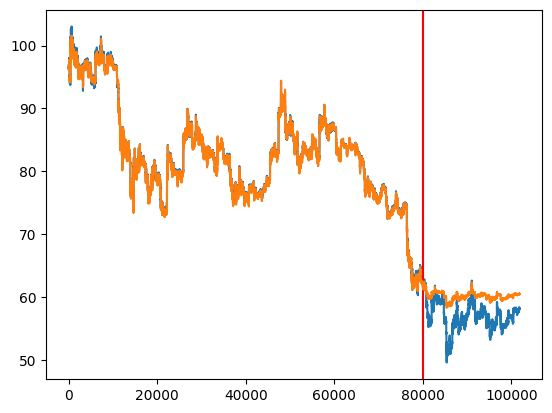

In [49]:
test_predicted=model.predict(X_test)
train_predicted=model.predict(X_train)

real=np.concatenate((y_train,y_test))
predicted=np.concatenate((train_predicted,test_predicted))

plt.plot(real)
plt.axvline(len(y_train), color="r")
plt.plot(predicted)

x_step=5

with minmax scaling

return_sequences=False for parallel computation

optimizer='rmsprop'

Epoch 1/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 1474.7976
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.6100
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.2859
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.1874
Epoch 5/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.1483
Epoch 6/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.1258
Epoch 7/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.1141
Epoch 8/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.1064
Epoch 9/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.1012
Epoch 10/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.0982


<Axes: >

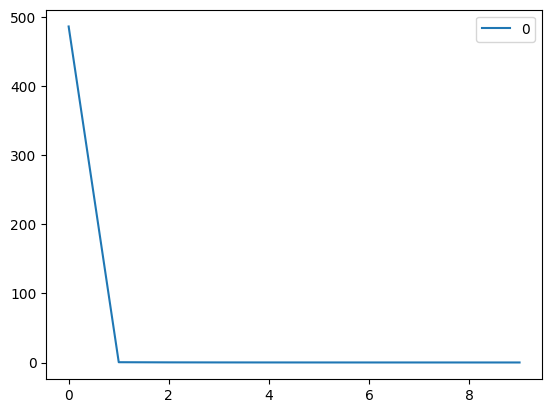

In [50]:
x_step=5
X_train, y_train=convert_data(data=dataset[:80000], x_step=x_step)
X_test, y_test=convert_data(data=dataset[80000:], x_step=x_step)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0, 1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

model=Sequential()
model.add(Input(shape=(x_step,1)))
model.add(SimpleRNN(64, return_sequences=False))
#model.add(SimpleRNN(64))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mean_squared_error')

history=model.fit(X_train, y_train, epochs=10, batch_size=16)

df1=pd.DataFrame(history.history['loss'])
df1.plot()

684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


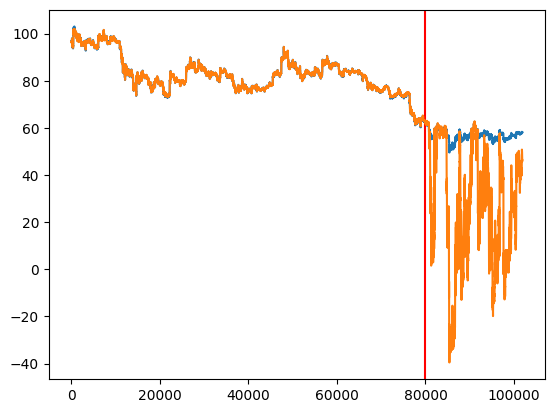

In [51]:
test_predicted=model.predict(X_test)
train_predicted=model.predict(X_train)

real=np.concatenate((y_train,y_test))
predicted=np.concatenate((train_predicted,test_predicted))

plt.plot(real)
plt.axvline(len(y_train), color="r")
plt.plot(predicted)

x_step=10

with minmax scaling

optimizer='rmsprop'

Epoch 1/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 1348.2606
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 34s 6ms/step - loss: 60.7339
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 43s 6ms/step - loss: 1.0435
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 0.3858
Epoch 5/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - loss: 0.2794
Epoch 6/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - loss: 0.2327
Epoch 7/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - loss: 0.2061
Epoch 8/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - loss: 0.1908
Epoch 9/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - loss: 0.1770
Epoch 10/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - loss: 0.1701


<Axes: >

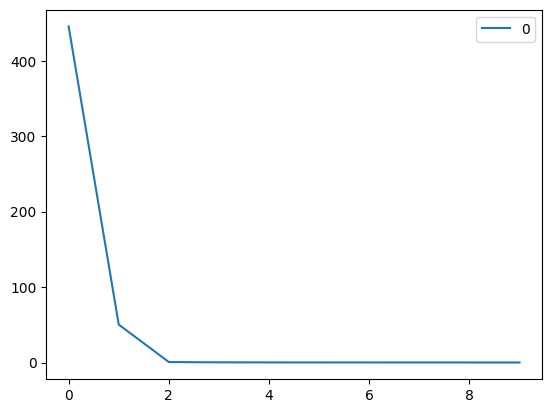

In [52]:
x_step=10
X_train, y_train=convert_data(data=dataset[:80000], x_step=x_step)
X_test, y_test=convert_data(data=dataset[80000:], x_step=x_step)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0, 1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

model=Sequential()
model.add(Input(shape=(x_step,1)))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(64))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mean_squared_error')

history=model.fit(X_train, y_train, epochs=10, batch_size=16)

df1=pd.DataFrame(history.history['loss'])
df1.plot()

684/684 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


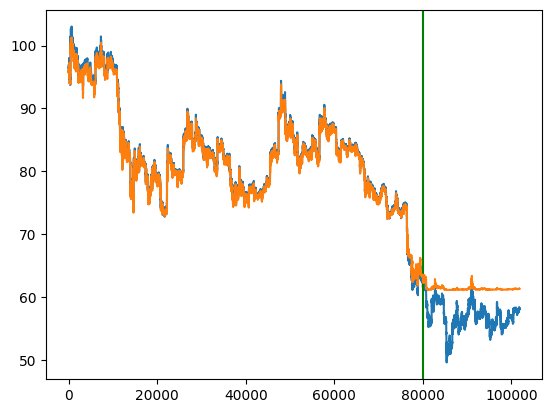

In [53]:
test_predicted=model.predict(X_test)
train_predicted=model.predict(X_train)

real=np.concatenate((y_train,y_test))
predicted=np.concatenate((train_predicted,test_predicted))

plt.plot(real)
plt.axvline(len(y_train), color="g")
plt.plot(predicted)

x_step=6

with minmax scaling

optimizer='rmsprop'

with dropout layer

Epoch 1/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - loss: 1482.3259
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 104.0768
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 49.9231
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 43.5706
Epoch 5/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 41.7824
Epoch 6/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 40.3215
Epoch 7/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - loss: 39.2674
Epoch 8/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 37.9662
Epoch 9/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 36.6684
Epoch 10/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - loss: 35.1310


<Axes: >

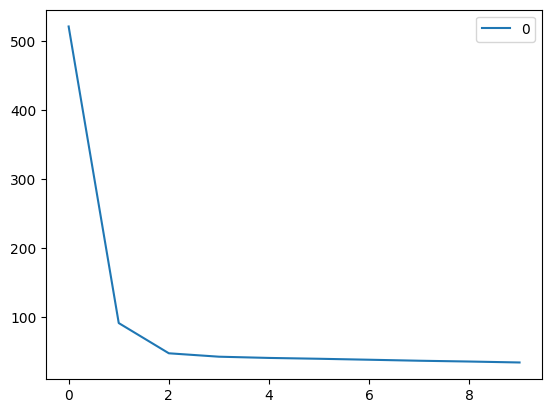

In [54]:
x_step=6
X_train, y_train=convert_data(data=dataset[:80000], x_step=x_step)
X_test, y_test=convert_data(data=dataset[80000:], x_step=x_step)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0, 1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

from tensorflow.keras.layers import Dropout

model=Sequential()
model.add(Input(shape=(x_step,1)))
model.add(SimpleRNN(64, return_sequences=True))
model.add(Dropout(0.3))
model.add(SimpleRNN(64))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mean_squared_error')

history=model.fit(X_train, y_train, epochs=10, batch_size=16)

df1=pd.DataFrame(history.history['loss'])
df1.plot()

684/684 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


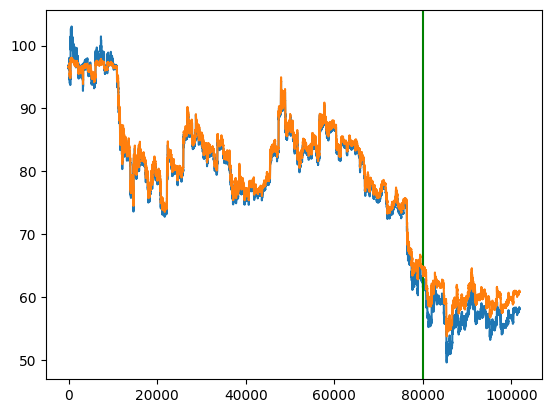

In [55]:
test_predicted=model.predict(X_test)
train_predicted=model.predict(X_train)

real=np.concatenate((y_train,y_test))
predicted=np.concatenate((train_predicted,test_predicted))

plt.plot(real)
plt.axvline(len(y_train), color="g")
plt.plot(predicted)